# Statistics in Python - Performing Analysis of Variance (ANOVA)

## Task 1: Intro Python

In [2]:
print("World Bank") # this is a string
print(5) # this is integer
print(5.5) # this is float
print(True) # this is Boolean. "T" should be capital otherwise will return an error.
print(False) # this is Boolean. "F" should be capital otherwise will return an error.

World Bank
5
5.5
True
False


Basic statistics we'll cover in this project such as mean, standard deviation, and ANOVA.


## Task 2: Load libraries and download data from the World Bank website.

The education data is from the worldbank website data repository.

https://data.worldbank.org/topic/education?cid=EXT_TWBN_D_EXT

By clicking on data bank, you are able to access
lots of different categories, including things on science
and technology employment.
It is a great wealth of data, but we're going to focus
on education.

If you scroll down slightly, there is a section called
Download.
We want to download CSV files for our analysis today.
So click on the CSV button.

### Load Libraries

In [4]:
import pandas as pd
import numpy as np

### Read the dataset
I noticed whenever I opened the file, there was
titles and things in the first four rows. 
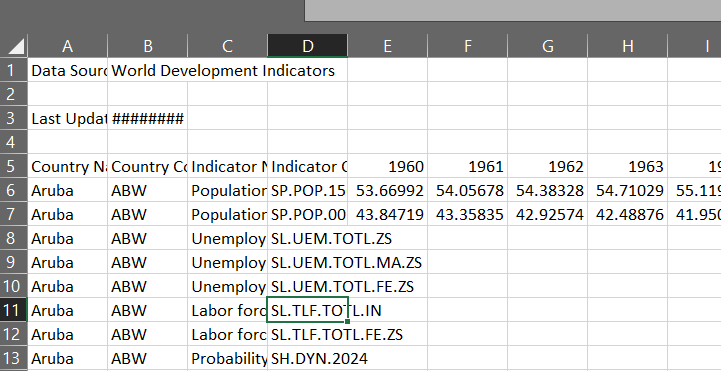

Thus, I want to load the data but skip the first four rows otherwise I'm going to get the error below:
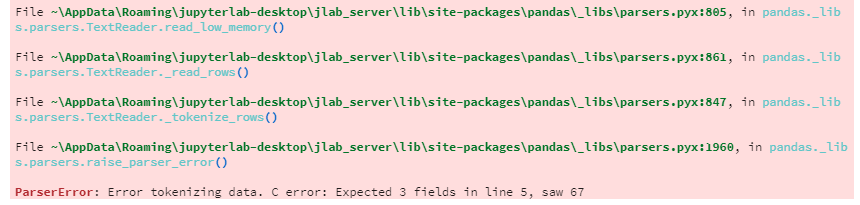

In [6]:
main_data = pd.read_csv('dataset/API_4_DS2_en_csv_v2_4154099.csv', skiprows=4)
main_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,53.669919,54.056784,54.383281,54.710292,55.119933,55.631102,...,69.108851,69.181105,69.159774,69.137615,68.946339,68.646606,68.321199,68.012289,NaN,NaN
1,Aruba,ABW,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.847190,43.358346,42.925745,42.488756,41.950133,41.290098,...,19.593055,19.111724,18.703098,18.257495,17.980183,17.802447,17.620445,17.381938,NaN,NaN
2,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Unemployment, male (% of male labor force) (mo...",SL.UEM.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Now let's load the metadata country file too
country_data = pd.read_csv('dataset/Metadata_Country_API_4_DS2_en_csv_v2_4154099.csv') # this time we don't need to skiprows
country_data.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


## Task 3: Sort and merge two datasets

In [10]:
# check all columns of our data
main_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

We can see all of the columns in our dataset. It appears we have all of the years from 1960 to
2021 in our dataset.

When we scroll back up to see the head of our main_data, we have the Country, Country Code, and Indicatior. Also, we'll notice that there are many missing data in various years columns.

In [12]:
# We only want to keep one of the indicators because at the
# minute there is multiple rows for each country.

main_data['Indicator Name'].unique()

array(['Population ages 15-64 (% of total population)',
       'Population ages 0-14 (% of total population)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Unemployment, male (% of male labor force) (modeled ILO estimate)',
       'Unemployment, female (% of female labor force) (modeled ILO estimate)',
       'Labor force, total',
       'Labor force, female (% of total labor force)',
       'Probability of dying among youth ages 20-24 years (per 1,000)',
       'Probability of dying among adolescents ages 15-19 years (per 1,000)',
       'Probability of dying among adolescents ages 10-14 years (per 1,000)',
       'Probability of dying among children ages 5-9 years (per 1,000)',
       'Number of deaths ages 20-24 years',
       'Number of deaths ages 15-19 years',
       'Number of deaths ages 10-14 years',
       'Number of deaths ages 5-9 years',
       'Government expenditure on education, total (% of GDP)',
       'Government expenditure o

We can see that there are a lot of indicators here. The one which I'd like to use for this project is the
unemployment rate for females. For this, find and use ctrl+c to copy the unique value "***'Unemployment, female (% of female labor force) (modeled ILO estimate)'***".

In [13]:
# Let's subset the data
main_data_unem = main_data[main_data["Indicator Name"] == 'Unemployment, female (% of female labor force) (modeled ILO estimate)']
main_data_unem.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
4,Aruba,ABW,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Africa Eastern and Southern,AFE,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.920877,6.869008,6.987366,7.106266,7.203034,7.216032,7.362899,8.023405,8.708145,NaN
328,Afghanistan,AFG,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.248000,14.152000,14.094000,14.084000,14.063000,14.012000,14.065000,16.863001,19.090000,NaN
490,Africa Western and Central,AFW,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.589035,5.196423,5.139525,6.187513,6.544402,6.169725,5.804865,6.491670,6.667710,NaN
652,Angola,AGO,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.741000,7.754000,7.781000,7.807000,7.810000,7.829000,7.835000,8.774000,9.112000,NaN


We now have one per country and then the indicator name is the same for all of them. They
still have all of our years. Scrolling across, we can see that there actually isn't any data before 1991.
We want to make sure that we don't include that in our dataset.

In [14]:
# Subset the data so we can have only all the columns that we want
# delete from Indicator Name until 1990
main_data_unem = main_data_unem[['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']] # we use two brackets here because we want to show this as a list

main_data_unem.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
4,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Africa Eastern and Southern,AFE,7.846252,7.866403,7.859796,7.861505,7.904829,7.971418,8.029350,8.033045,...,7.062661,6.920877,6.869008,6.987366,7.106266,7.203034,7.216032,7.362899,8.023405,8.708145
328,Afghanistan,AFG,13.615000,13.816000,13.712000,13.722000,14.235000,14.000000,13.805000,13.833000,...,14.453000,14.248000,14.152000,14.094000,14.084000,14.063000,14.012000,14.065000,16.863001,19.090000
490,Africa Western and Central,AFW,4.357443,4.553999,4.568860,4.567161,4.556843,4.589577,4.632976,4.711834,...,4.858016,4.589035,5.196423,5.139525,6.187513,6.544402,6.169725,5.804865,6.491670,6.667710
652,Angola,AGO,3.606000,3.584000,3.579000,3.502000,3.441000,3.404000,3.374000,3.338000,...,7.715000,7.741000,7.754000,7.781000,7.807000,7.810000,7.829000,7.835000,8.774000,9.112000


So now we've got our dataset and there is still some missing values.
But we're going to deal with that after we merge our datasets.

Now, let's exclude some columns from the __country_data__ so that only country code, income group and region are kept.

In [15]:
country_data.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName',
       'Unnamed: 5'],
      dtype='object')

In [18]:
country_data_2 = country_data[['Country Code', 'Region', 'IncomeGroup']]
country_data_2.head()

,Country Code,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFE,NaN,NaN
2,AFG,South Asia,Low income
3,AFW,NaN,NaN
4,AGO,Sub-Saharan Africa,Lower middle income


### Merge our data

In [19]:
merged_data = pd.merge(main_data_unem, country_data_2, # what we're doing here is take all the lines in main
                                                       # data, but only to match them up if they exist in main
                                                       # data with the countries here.
                                                       # Which means if there are some countries and country data
                                                       # are not in main data, we won't actually pull this through.
                       on = 'Country Code') # We want to tell it what merge onto.
                                            # Both of them have country code, which is what we want them to
                                            # look up from and check if they are the same.

merged_data.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,Region,IncomeGroup
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income
1,Africa Eastern and Southern,AFE,7.846252,7.866403,7.859796,7.861505,7.904829,7.971418,8.029350,8.033045,...,6.869008,6.987366,7.106266,7.203034,7.216032,7.362899,8.023405,8.708145,NaN,NaN
2,Afghanistan,AFG,13.615000,13.816000,13.712000,13.722000,14.235000,14.000000,13.805000,13.833000,...,14.152000,14.094000,14.084000,14.063000,14.012000,14.065000,16.863001,19.090000,South Asia,Low income
3,Africa Western and Central,AFW,4.357443,4.553999,4.568860,4.567161,4.556843,4.589577,4.632976,4.711834,...,5.196423,5.139525,6.187513,6.544402,6.169725,5.804865,6.491670,6.667710,NaN,NaN
4,Angola,AGO,3.606000,3.584000,3.579000,3.502000,3.441000,3.404000,3.374000,3.338000,...,7.754000,7.781000,7.807000,7.810000,7.829000,7.835000,8.774000,9.112000,Sub-Saharan Africa,Lower middle income


Great! We've now been able to create and merged dataset which has the
country name, country code, all the years from 1991 to 2021. And then it has a region and an income group at
the end.

## Task 4: Clean missing data and perform Exploratory Data Analysis (EDA).

In this task, we're going to do some data cleaning
by excluding some of the missing values and
then we're going to look at exploratory data analysis to get
to know our data set a little bit better.

In [20]:
# check for na in the dataset
merged_data.isna()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,Region,IncomeGroup
0,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
261,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
262,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
263,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


This will basically tell us if there are any rows with any
missing values in the data set.
This returns us a true or false value for every single data
point in our dataset  We can see here we have 265 rows
and 35 columns, so that's a lot of data.

This true or false is a Boolean value and what
we can do with that is actually add
the sum function. And that will sum up how many values are missing by counting
True for is missing as one and false for zero.

In [21]:
merged_data.isna().sum()

Country Name     0
Country Code     0
1991            30
1992            30
1993            30
1994            30
1995            30
1996            30
1997            30
1998            30
1999            30
2000            30
2001            30
2002            30
2003            30
2004            30
2005            30
2006            30
2007            30
2008            30
2009            30
2010            30
2011            30
2012            30
2013            30
2014            30
2015            30
2016            30
2017            30
2018            30
2019            30
2020            30
2021            30
Region          48
IncomeGroup     49
dtype: int64

Running this we get a list. We've got country named, country code for all of our data set.
It seems 30 countries are missing all of the data. But actually, we've got 48 countries which don't have
a region and 49 countries that don't have income code, which we're going to use a lot
in our analysis. Therefore, in our analysis for this, we will exclude all of them.

In [22]:
# drop all na's
merged_data_clean = merged_data.dropna()

# check the shape
merged_data_clean.shape

(186, 35)

Now we have 186 rows. So we can see that all
of the rows which had missing data have now been excluded.

Next, we want to create a data set which looks at our income
group. So we can do this by using the group by function.

In [23]:
grouped_data_income = merged_data_clean.groupby(['IncomeGroup']).describe()
grouped_data_income

1991                                                    \
                    count       mean       std    min    25%    50%     75%   
IncomeGroup                                                                   
High income          57.0   8.196754  6.046202  1.089  2.947  6.540  11.630   
Low income           27.0   5.993481  5.969099  0.149  2.421  3.768   6.639   
Lower middle income  53.0   8.672849  9.489251  0.509  2.084  4.372  12.217   
Upper middle income  49.0  11.127184  9.295845  0.502  4.317  7.996  16.136   

                                1992             ...       2020             \
                           max count       mean  ...        75%        max   
IncomeGroup                                      ...                         
High income          25.393000  57.0   8.616965  ...   8.345000  20.382000   
Low income           23.025000  27.0   5.893037  ...  11.601000  31.226999   
Lower middle income  43.542000  53.0   8.662604  ...  13.196000  40.023998   
Upper middle income  35.665001  49.0  11.721429  ...  18.617001  32.111000   

                     2021                                              \
                    count       mean       std    min     25%     50%   
IncomeGroup                                                             
High income          57.0   7.526860  4.360513  0.620  4.8040   6.647   
Low income           27.0   9.226778  8.767574  0.664  3.2395   4.782   
Lower middle income  53.0  10.733283  9.286458  0.717  4.4790   7.027   
Upper middle income  49.0  13.366633  8.748964  1.412  5.4640  11.930   

                                         
                         75%        max  
IncomeGroup                              
High income           8.8790  21.573000  
Low income           11.9915  31.818001  
Lower middle income  13.5220  39.728001  
Upper middle income  18.8720  35.680000  

[4 rows x 248 columns]

What we got here is we get the count, the mean standard deviation, the min,
the percentiles and the max for each of the years, for each
of the income groups that we have. This interesting if we want to just quickly glance and see what's going
on in our data.

What we can also do is change the describe to be mean, or min or max or median if we're
interested in.

In [25]:
# I'm going to make it mean, because that's what I want to do for the rest of the data.
grouped_data_income = merged_data_clean.groupby(['IncomeGroup']).mean()
grouped_data_income

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
IncomeGroup,,,,,,,,,,,,,,,,,,,,,
High income,8.196754,8.616965,9.549018,9.729158,9.457386,9.554175,9.151912,8.929333,8.932053,8.657088,...,9.210123,9.319509,8.946632,8.466597,8.025649,7.441965,6.849070,6.454561,7.567316,7.526860
Low income,5.993481,5.893037,5.768815,6.006852,6.154222,6.226519,6.306407,6.431704,6.543185,6.817815,...,7.940444,7.854185,7.786000,7.922963,7.938556,7.933852,7.905667,7.898519,8.866593,9.226778
Lower middle income,8.672849,8.662604,8.914340,9.068000,9.223604,9.269358,9.320321,9.483151,9.490811,9.458585,...,9.239566,9.230774,9.174245,9.367510,9.434698,9.408623,9.285792,9.240774,10.504472,10.733283
Upper middle income,11.127184,11.721429,12.165490,12.525980,12.966408,13.574633,13.623816,13.636306,13.679918,13.441163,...,11.977347,12.070980,12.038898,12.008551,11.950245,11.749816,11.434735,11.366755,13.020102,13.366633


And now we have a dataset that has an income group. For each of the years, it has the unemployment rate
as a percentage as a mean of all of the countries
that were included in this data set.

Next, we're going to try plotting some of the data.
So what would be useful for us to do is to transpose
this data set. What that means is we're going to flip the rows
and the columns.

In [26]:
transposed_income_group = grouped_data_income.transpose()
transposed_income_group

IncomeGroup,High income,Low income,Lower middle income,Upper middle income
1991,8.196754,5.993481,8.672849,11.127184
1992,8.616965,5.893037,8.662604,11.721429
1993,9.549018,5.768815,8.914340,12.165490
1994,9.729158,6.006852,9.068000,12.525980
1995,9.457386,6.154222,9.223604,12.966408
1996,9.554175,6.226519,9.269358,13.574633
1997,9.151912,6.306407,9.320321,13.623816
1998,8.929333,6.431704,9.483151,13.636306
1999,8.932053,6.543185,9.490811,13.679918
2000,8.657088,6.817815,9.458585,13.441163


So now we have income group across the top (column names), and we have all
of our years across in the rows. Now to do some plotting so that we
can look at this data a bit more useful, we actually need to import some more libraries.
we're going to use matplotlib since it is very popular plotting library in python.

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

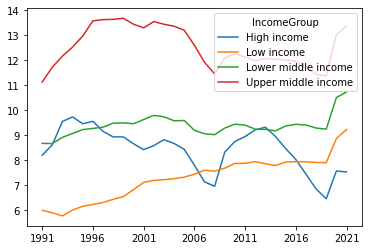

In [28]:
# use plot function
transposed_income_group.plot()

We got a very tiny plot that isn't very useful to read.

<AxesSubplot:>

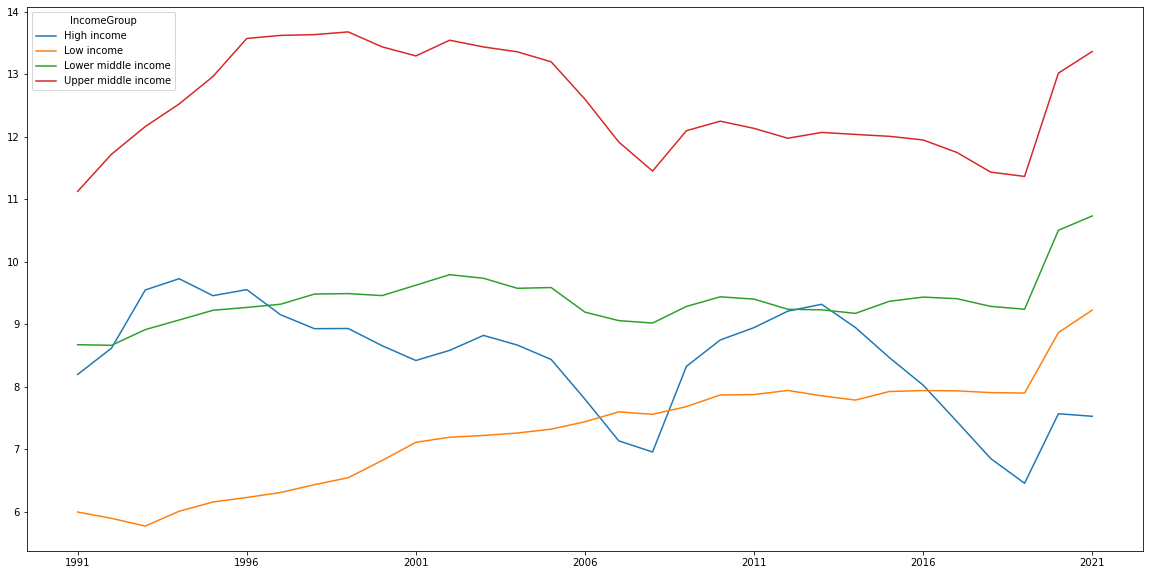

In [29]:
# Let's confidbure the figsize
transposed_income_group.plot(figsize=(20,10))

Now we got a nice big plot.

We have a plot which shows each of the income groups
across the years from 1991 to 2021. It has included
a legend for us, which shows that we have high income
and blue, upper middle in red, low income in yellow and the
lower middle in green. 

To make this plot but easier to read
and in case we wanted to use the plot for anything, let's put some title.

Text(0, 0.5, 'Employment')

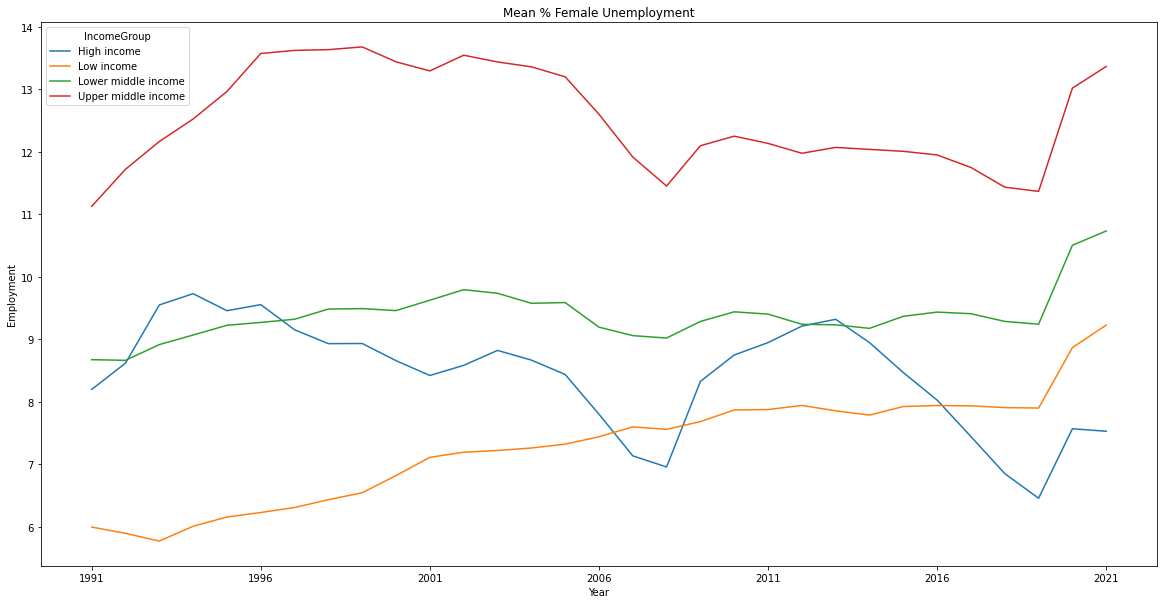

In [30]:
transposed_income_group.plot(figsize=(20,10))
plt.title('Mean % Female Unemployment')
plt.xlabel("Year")
plt.ylabel("Employment")

Now let's make similar analysis but for the __Region__.

Text(0, 0.5, 'Employment')

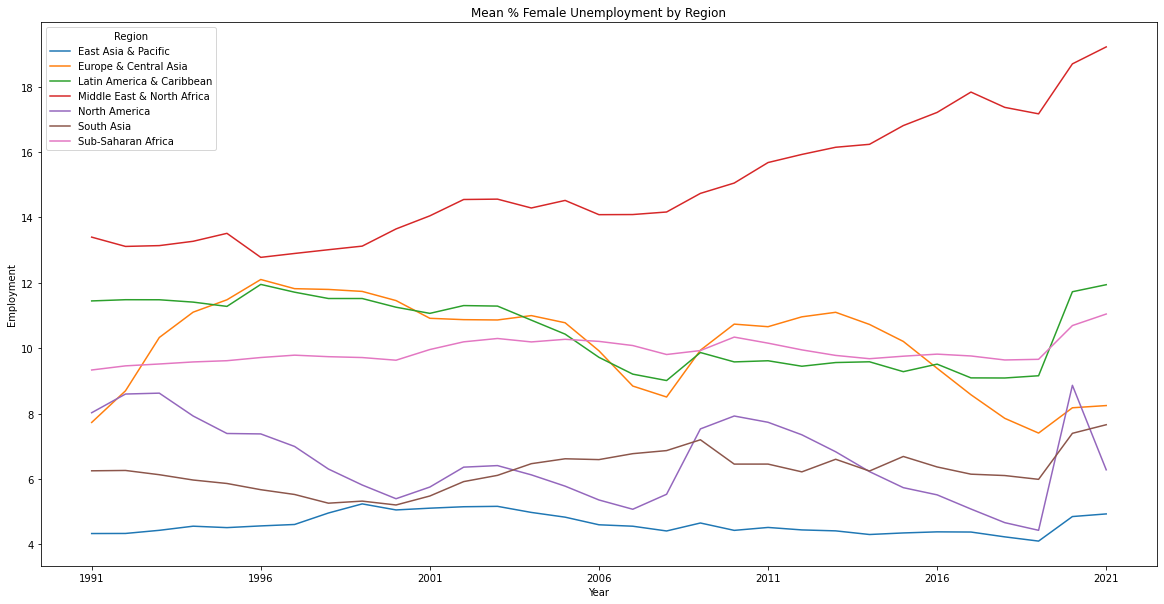

In [35]:
grouped_data_region = merged_data_clean.groupby(['Region']).mean()
transposed_region_group = grouped_data_region.transpose()

transposed_region_group.plot(figsize=(20,10))
plt.title('Mean % Female Unemployment by Region')
plt.xlabel("Year")
plt.ylabel("Employment")

Again we've just changed the income group to region and again
we've used mean then transposed this dataset by using
the transposed function and then used the plot function, setting
the fig size to 20 and 10.

We've changed the title to include by region.
And then we've been able to create this plot above, which
has a legend showing all of the different regions
and the percentage unemployment in them.

## Task 5: Perform Analysis of Variance (ANOVA).

In this task, we're going to import a new library called SciPy.
We're going to use this to perform anova on our group data.

In [36]:
# Let's begin by importing the package that we need to import.
# We're going to be using a library called SciPy,
# and we're going to import a specific package called stats.

import scipy.stats as stats

When we're running our code to run our ANOVA analysis,
we need to split our data into individual datasets to make
it easier for us to put these datasets into the ANOVA
function.

In [37]:
# Let's check again our merged_data_clean
merged_data_clean.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,Region,IncomeGroup
2,Afghanistan,AFG,13.615,13.816000,13.712,13.722000,14.235000,14.000,13.805000,13.833,...,14.152,14.094,14.084,14.063,14.012,14.065,16.863001,19.090,South Asia,Low income
4,Angola,AGO,3.606,3.584000,3.579,3.502000,3.441000,3.404,3.374000,3.338,...,7.754,7.781,7.807,7.810,7.829,7.835,8.774000,9.112,Sub-Saharan Africa,Lower middle income
5,Albania,ALB,10.272,27.106001,23.031,18.938999,14.122000,12.937,15.745000,19.778,...,15.456,17.114,14.467,12.499,11.871,11.322,13.168000,11.930,Europe & Central Asia,Upper middle income
8,United Arab Emirates,ARE,2.574,2.515000,2.476,2.404000,2.359000,2.436,2.501000,2.614,...,4.789,4.470,4.208,7.111,6.583,5.892,7.470000,8.125,Middle East & North Africa,High income
9,Argentina,ARG,5.745,6.708000,12.530,13.902000,22.167999,19.174,17.603001,14.016,...,8.374,8.624,9.234,9.473,10.541,10.698,12.375000,13.277,Latin America & Caribbean,Upper middle income


So this is the dataset that we want to be using
for this analysis.
We're going to be focusing on the 2020 data because 2021 isn't
completely finished.
We're going to be focusing on these two columns __Region__
and __IncomeGroup__.

In [38]:
# Let's create an array of the unique values of income group.
income_groups = merged_data_clean['IncomeGroup'].unique()
income_groups

array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income'], dtype=object)

It says that we have an array here.
An array is the element between the square brackets
It's like a list of different
data points which could be made up of different data types.
In this one, we've got four different ones, all of which are strings.

Note: If we want to access a specific square bracket and a number. See sample below:

In [39]:
income_groups[1]

'Lower middle income'

In [40]:
# Now we can create a four loop looping through these
for i in range(len(income_groups)):
    print(income_groups[i])

Low income
Lower middle income
Upper middle income
High income


What we actually want this to do is create a new array.

In [41]:
income_group_data = []
for i in range(len(income_groups)):
    income_group_data.append(merged_data_clean['2020'][merged_data_clean['IncomeGroup'] == income_groups[i]])

In [43]:
# Now let's run our our ANOVA test
stats.f_oneway(income_group_data[0], income_group_data[1], income_group_data[2], income_group_data[3])

F_onewayResult(statistic=4.709817200433728, pvalue=0.0034306311306931555)

Now we get a statistic and a P-value printed out.

So let's make this a bit more readable, so we can then add
two variables at the beginning.

In [46]:
statistic, pvalue = stats.f_oneway(income_group_data[0], 
                                    income_group_data[1], 
                                    income_group_data[2], 
                                    income_group_data[3])
print("Statistic: %s pvalue %s" %(statistic, pvalue)) # use the "%s" to signify that we're going to tell it a string.

# Then when we run this, it is actually even a little bit nicer.

Statistic: 4.709817200433728 pvalue 0.0034306311306931555


Now, let's perform same analysis for __Region__.

In [48]:
region_groups = merged_data_clean['Region'].unique()
print(region_groups)

region_group_data = []
for i in range(len(region_groups)):
    region_group_data.append(merged_data_clean['2020'][merged_data_clean['Region'] == region_groups[i]])
    
statistic, pvalue = stats.f_oneway(region_group_data[0], region_group_data[1], 
                                   region_group_data[2], region_group_data[3],
                                   region_group_data[4], region_group_data[5],
                                  region_group_data[6])
print("Statistic: %s pvalue %s" %(statistic, pvalue)) # use the "%s" to signify that we're going to tell it a string.

# Then when we run this, it is actually even a little bit nicer.

['South Asia' 'Sub-Saharan Africa' 'Europe & Central Asia'
 'Middle East & North Africa' 'Latin America & Caribbean'
 'East Asia & Pacific' 'North America']
Statistic: 9.05082639222719 pvalue 1.2123259577026e-08


## Task 6: Create boxplots.

Whenever we ran the region code, we didn't actually get
something that was easy to read.
This is in scientific notation when sometimes it's quite hard
to read. A very simple thing, we can do is add an if statement.

In [49]:
region_groups = merged_data_clean['Region'].unique()
print(region_groups)

region_group_data = []
for i in range(len(region_groups)):
    region_group_data.append(merged_data_clean['2020'][merged_data_clean['Region'] == region_groups[i]])
    
statistic, pvalue = stats.f_oneway(region_group_data[0], region_group_data[1], 
                                   region_group_data[2], region_group_data[3],
                                   region_group_data[4], region_group_data[5],
                                  region_group_data[6])
print("Statistic: %s pvalue %s" %(statistic, pvalue))

if pvalue < 0.05:
    print("Significant")
else:
    print("Not Significant")

['South Asia' 'Sub-Saharan Africa' 'Europe & Central Asia'
 'Middle East & North Africa' 'Latin America & Caribbean'
 'East Asia & Pacific' 'North America']
Statistic: 9.05082639222719 pvalue 1.2123259577026e-08
Significant


So I know that this value actually is less than nought point
nought five.

Now we can add a box plots using matlibplot, which
we used earlier as we used this library earlier.

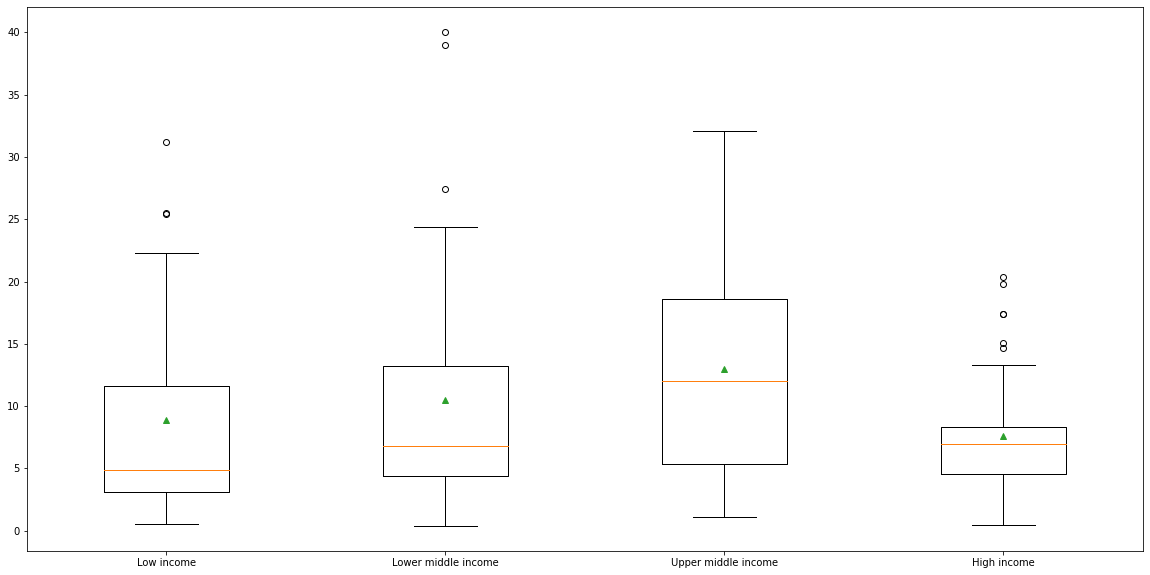

In [51]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111) # ax means axis

ax.boxplot(income_group_data, labels=income_groups, showmeans=True)

plt.show()

When we run this code, we will get a boxpolt underneath.
You can see one for low income, lower middle, upper, middle
and high income and and it shows all of the outliers 
and the difference between these four. These green dots in
middle are actually our means.
The line inside the box, is our median.

Now let's make this plot look a bit better.
You need to add a title.

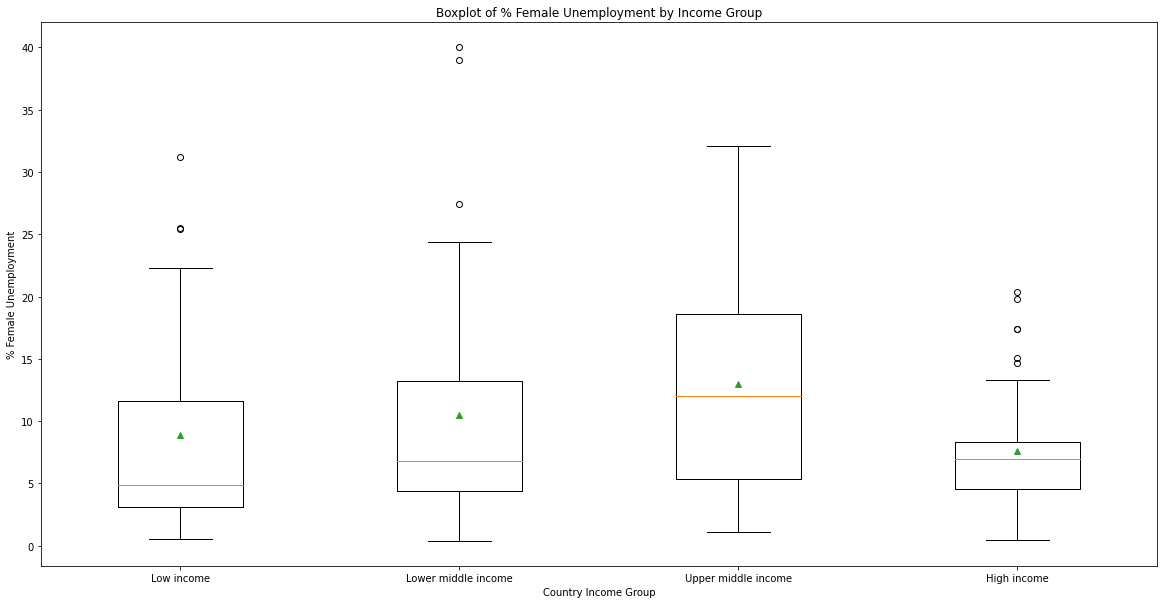

In [53]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111) # ax means axis

ax.set_title("Boxplot of % Female Unemployment by Income Group")
ax.set

ax.boxplot(income_group_data, labels=income_groups, showmeans=True)

plt.xlabel("Country Income Group")
plt.ylabel("% Female Unemployment")
plt.show()

Now we can see we have a title and we have on
percentage female unemployment label and an x label of
country income.

Quite interesting to look at this data, we see that there are actually quite a lot of outliers for
three of the groups. This could be something that might be useful to look into
if we will go deeper analyzing this dataset.

Now, let's use matplotlib to create a box plot
for the region's data using the same logic that would be used
to create box plot for the income group data.

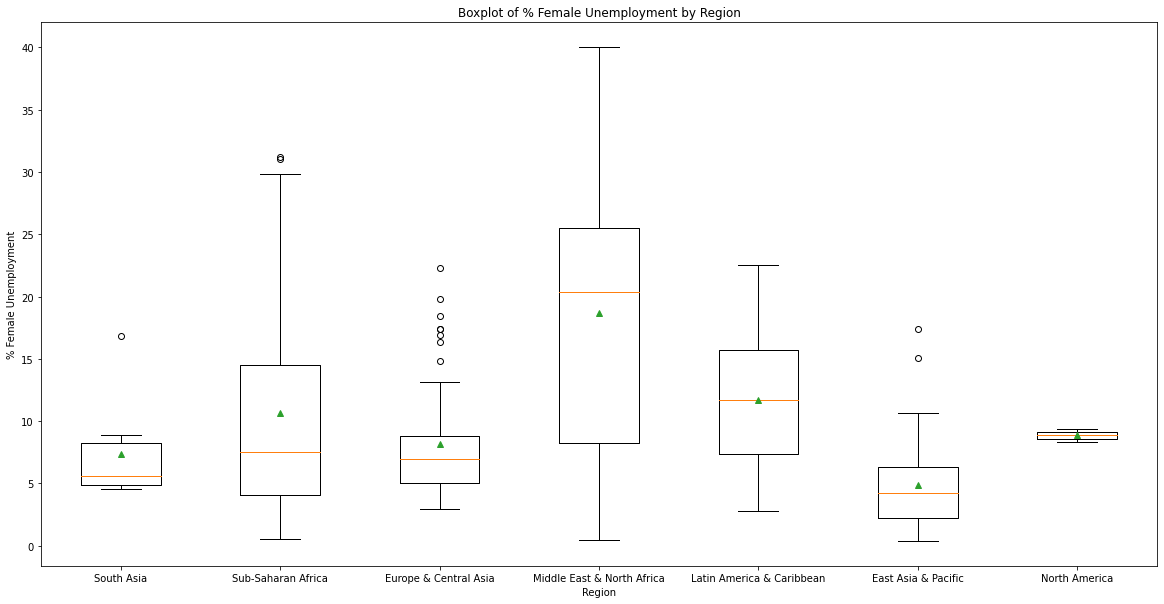

In [55]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111) # ax means axis

ax.set_title("Boxplot of % Female Unemployment by Region")
ax.set

ax.boxplot(region_group_data, labels=region_groups, showmeans=True)

plt.xlabel("Region")
plt.ylabel("% Female Unemployment")
plt.show()

Now, we get a boxplot which has more actual boxplots in it because there are more regions than
income group.

We can see that there is a greater difference between the
box plots with the Middle East and North Africa region having
a really big range. 

And North America being an odd looking
box plot. But if you think about this, North America actually has two
countries in it - the U. S.A and Canada.
So it makes sense that box plot isn't actually
that useful to look up.